In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree



# Load the datasetimport matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

import pycaret 
from pycaret.classification import *

In [2]:
data = pd.read_csv("airport_data.csv")
data

,airport,date,hour,Scheduled_volume,Actual_volume,diff,diff1,diff2,diff3,diff4,diff5,temperature,wind_speed,wind_gust,visibility,ceiling,in_1_hour_precip
0,DEN,1/1/2013,8,94,95,-1,9,0,-1,0,-1,-11.7,4.0,NaN,9.00,40000.0,0.00
1,DEN,1/1/2013,9,108,104,4,-1,9,0,-1,0,-13.9,0.0,NaN,9.00,40000.0,0.00
2,DEN,1/1/2013,10,146,145,1,4,-1,9,0,-1,-11.1,4.0,NaN,7.00,6500.0,0.00
3,DEN,1/1/2013,11,131,128,3,1,4,-1,9,0,-12.2,6.0,NaN,7.00,5000.0,0.00
4,DEN,1/1/2013,12,86,88,-2,3,1,4,-1,9,-11.7,9.0,NaN,8.00,14000.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28396,DEN,4/30/2016,19,62,61,1,1,-3,-5,1,1,1.1,18.0,NaN,0.25,600.0,0.02
28397,DEN,4/30/2016,20,39,40,-1,1,1,-3,-5,1,1.1,16.0,26.0,0.75,400.0,0.03
28398,DEN,4/30/2016,21,20,21,-1,-1,1,1,-3,-5,1.1,20.0,NaN,0.75,600.0,0.02
28399,DEN,4/30/2016,22,19,19,0,-1,-1,1,1,-3,0.6,13.0,NaN,0.50,300.0,0.01


In [3]:
columns = ['airport']
df = data.drop(columns, axis=1)

In [4]:
df.head()

,date,hour,Scheduled_volume,Actual_volume,diff,diff1,diff2,diff3,diff4,diff5,temperature,wind_speed,wind_gust,visibility,ceiling,in_1_hour_precip
0,1/1/2013,8,94,95,-1,9,0,-1,0,-1,-11.7,4.0,NaN,9.0,40000.0,0.0
1,1/1/2013,9,108,104,4,-1,9,0,-1,0,-13.9,0.0,NaN,9.0,40000.0,0.0
2,1/1/2013,10,146,145,1,4,-1,9,0,-1,-11.1,4.0,NaN,7.0,6500.0,0.0
3,1/1/2013,11,131,128,3,1,4,-1,9,0,-12.2,6.0,NaN,7.0,5000.0,0.0
4,1/1/2013,12,86,88,-2,3,1,4,-1,9,-11.7,9.0,NaN,8.0,14000.0,0.0


In [5]:
# List the column names
column_names = df.columns
print(column_names)

Index(['date', 'hour', 'Scheduled_volume', 'Actual_volume', 'diff', 'diff1',
       'diff2', 'diff3', 'diff4', 'diff5', 'temperature', 'wind_speed',
       'wind_gust', 'visibility', 'ceiling', 'in_1_hour_precip'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28401 entries, 0 to 28400
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              28401 non-null  object 
 1   hour              28401 non-null  int64  
 2   Scheduled_volume  28401 non-null  int64  
 3   Actual_volume     28401 non-null  int64  
 4   diff              28401 non-null  int64  
 5   diff1             28401 non-null  int64  
 6   diff2             28401 non-null  int64  
 7   diff3             28401 non-null  int64  
 8   diff4             28401 non-null  int64  
 9   diff5             28401 non-null  int64  
 10  temperature       28368 non-null  float64
 11  wind_speed        28345 non-null  float64
 12  wind_gust         2656 non-null   float64
 13  visibility        28367 non-null  float64
 14  ceiling           28368 non-null  float64
 15  in_1_hour_precip  28368 non-null  float64
dtypes: float64(6), int64(9), object(1)
memor

In [7]:
# Detect and treat outliers using z-scores (you can adjust the threshold as needed)
# Columns to consider for outlier treatment
columns_to_check = ['hour', 'Scheduled_volume', 'Actual_volume', 'diff', 'diff1', 'diff2', 'diff3', 'diff4', 'diff5', 'temperature', 'wind_speed', 'wind_gust', 'visibility', 'ceiling', 'in_1_hour_precip']
# Loop through the selected columns and treat outliers
for column in columns_to_check:
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
outliers

,date,hour,Scheduled_volume,Actual_volume,diff,diff1,diff2,diff3,diff4,diff5,temperature,wind_speed,wind_gust,visibility,ceiling,in_1_hour_precip
247,1/11/2013,18,129,127,2,3,8,9,9,2,-3.9,10.0,21.0,0.25,400.0,0.02
248,1/11/2013,19,99,89,10,2,3,8,9,9,-3.9,14.0,NaN,5.00,600.0,0.04
252,1/11/2013,23,8,9,-1,-3,-5,-2,10,2,-8.3,13.0,NaN,0.50,1100.0,0.01
253,1/12/2013,0,4,7,-3,-1,-3,-5,-2,10,-10.0,8.0,NaN,6.00,9000.0,0.01
315,1/14/2013,16,85,83,2,-3,2,3,-4,2,-14.4,4.0,NaN,1.25,11000.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28396,4/30/2016,19,62,61,1,1,-3,-5,1,1,1.1,18.0,NaN,0.25,600.0,0.02
28397,4/30/2016,20,39,40,-1,1,1,-3,-5,1,1.1,16.0,26.0,0.75,400.0,0.03
28398,4/30/2016,21,20,21,-1,-1,1,1,-3,-5,1.1,20.0,NaN,0.75,600.0,0.02
28399,4/30/2016,22,19,19,0,-1,-1,1,1,-3,0.6,13.0,NaN,0.50,300.0,0.01


In [8]:
# Decide how to treat outliers
# we will replace outliers with the upper/lower bounds
df.loc[df[column] < lower_bound, column] = lower_bound
df.loc[df[column] > upper_bound, column] = upper_bound

# Print the number of outliers and the updated column
print(f"Column: {column}")
print(f"Number of outliers: {len(outliers)}")
print(f"Updated column statistics:\n{df[column].describe()}\n")

Column: in_1_hour_precip
Number of outliers: 1259
Updated column statistics:
count    28368.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: in_1_hour_precip, dtype: float64



In [50]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()
missing_values

hour                0
Scheduled_volume    0
diff                0
diff1               0
diff2               0
diff3               0
diff4               0
diff5               0
temperature         0
wind_speed          0
wind_gust           0
visibility          0
ceiling             0
in_1_hour_precip    0
day                 0
month               0
year                0
status              0
dtype: int64

In [47]:
columns_with_missing = ['wind_speed', 'visibility', 'ceiling','wind_gust']

# Impute missing values using mean strategy (you can choose other strategies)
imputer = SimpleImputer(strategy='mean')
df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

In [48]:
df.dropna(inplace=True)

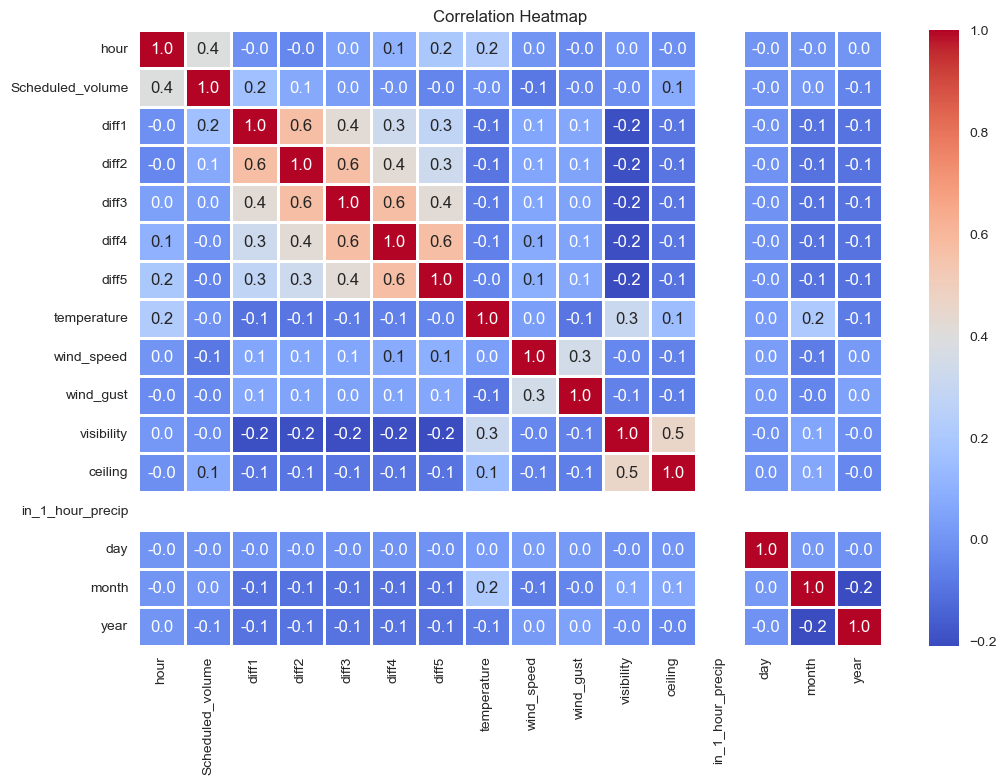

In [49]:
#  Multicollinearity
font_size =1
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=f".{font_size}f", linewidths=0.9)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
columns = ['Actual_volume']
df = df.drop(columns, axis=1)

In [14]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract day, month, and year into separate columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [15]:
df = df.drop('date', axis=1)

In [16]:
le = LabelEncoder()
df['day'] = le.fit_transform(df['day'])
df['month'] = le.fit_transform(df['month'])
df['year'] = le.fit_transform(df['year'])

In [17]:
#Part 2

In [18]:
# Features and target variable
X = df.drop('diff', axis=1)
y = df['diff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
#Create and fit the linear regression model
lr_model = LinearRegression().fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")
print(f"Linear Regression mean squared error: {rmse_lr}")

Linear Regression MAE: 3.2652213800893217
Linear Regression MSE: 23.410824065361336
Linear Regression R-squared: 0.35609390748825054
Linear Regression mean squared error: 4.838473319690968


In [19]:
# Features and target variable
X = df.drop(['diff'], axis=1)
y = df['diff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM model for classification
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
mae_svm = mean_absolute_error(y_test, y_pred)
mse_svm = mean_squared_error(y_test, y_pred)
r2_svm = r2_score(y_test, y_pred)
rmse_svm = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae_svm)
print("Mean Squared Error (MSE):", mse_svm)
print("R-squared (R2):", r2_svm)
print("Root Mean Squared Error (RMSE):", rmse_svm)

Mean Absolute Error (MAE): 3.6899894254494185
Mean Squared Error (MSE): 39.52044413112443
R-squared (R2): -0.08699525842207745
Root Mean Squared Error (RMSE): 6.286528782334845


In [20]:
# Create and fit the decision tree model
dt_model = DecisionTreeRegressor().fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

print(f"Decision Tree MAE: {mae_dt}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")
print(f"Decision Tree mean squared error: {rmse_dt}")

Decision Tree MAE: 2.900951709552344
Decision Tree MSE: 24.03595347197744
Decision Tree R-squared: 0.33889995342646495
Decision Tree mean squared error: 4.902647598183806


In [21]:
# Split the data into features (X) and target variable (y)
X = df.drop('diff', axis=1)
y = df['diff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest mean squared error: {rmse_rf}")

Random Forest MSE: 12.568842950299612
Random Forest R-squared: 0.6542986044008632
Random Forest RMSE: 3.5452564012070567
Random Forest mean squared error: 3.5452564012070567


In [22]:
# Create and fit the gradient boost model
gb_model = GradientBoostingRegressor().fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

print(f"Gradient Boost MSE: {mse_gb}")
print(f"Gradient Boost R-squared: {r2_gb}")
print(f"Gradient Boost RMSE: {rmse_gb}")
print(f"Gradient Boost mean squared error: {rmse_gb}")

Gradient Boost MSE: 13.957813205127826
Gradient Boost R-squared: 0.6160954891707253
Gradient Boost RMSE: 3.7360156858781823
Gradient Boost mean squared error: 3.7360156858781823


In [23]:
#part 3

In [24]:
new_df = df

In [25]:
# Convert "diff" to a categorical variable "status"
new_df['status'] = np.where(new_df['diff'] > 0, 'congested', 'normal')

# Drop the original "diff" column
new_df = new_df.drop(['diff'], axis=1)

# Split data into features and target
X = new_df.drop(['status'], axis=1)
y = new_df['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the KNN model
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, pos_label='congested')
lr_recall = recall_score(y_test, y_pred, pos_label='congested')
lr_f1 = f1_score(y_test, y_pred, pos_label='congested')

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

   congested       0.67      0.24      0.36      1226
      normal       0.82      0.97      0.89      4448

    accuracy                           0.81      5674
   macro avg       0.75      0.61      0.62      5674
weighted avg       0.79      0.81      0.77      5674


Confusion Matrix:
 [[ 298  928]
 [ 144 4304]]


In [27]:
# Create and fit the decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, pos_label='congested')
dt_recall = recall_score(y_test, y_pred_dt, pos_label='congested')
dt_f1 = f1_score(y_test, y_pred_dt, pos_label='congested')


# Generate classification report
classification_rep = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

   congested       0.47      0.48      0.48      1226
      normal       0.86      0.85      0.85      4448

    accuracy                           0.77      5674
   macro avg       0.66      0.67      0.67      5674
weighted avg       0.77      0.77      0.77      5674


Confusion Matrix:
 [[ 591  635]
 [ 660 3788]]


In [28]:
# Create and fit the random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

   congested       0.70      0.42      0.53      1226
      normal       0.86      0.95      0.90      4448

    accuracy                           0.84      5674
   macro avg       0.78      0.69      0.71      5674
weighted avg       0.82      0.84      0.82      5674


Confusion Matrix:
 [[ 520  706]
 [ 224 4224]]


In [29]:
# Create and fit the gradient boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_gb)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

   congested       0.72      0.33      0.45      1226
      normal       0.84      0.96      0.90      4448

    accuracy                           0.83      5674
   macro avg       0.78      0.65      0.67      5674
weighted avg       0.81      0.83      0.80      5674


Confusion Matrix:
 [[ 405  821]
 [ 159 4289]]


In [30]:
# Create an Neural Network MLPClassifier model with 128 neurons in one hidden layer #"sgd": stochastic gradient descen
nn_model = MLPClassifier(hidden_layer_sizes=(128,), solver='sgd', learning_rate_init=0.01, max_iter=100, random_state=42)

# Fit the model to the training data
nn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nn = nn_model.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_nn)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

   congested       1.00      0.00      0.00      1226
      normal       0.78      1.00      0.88      4448

    accuracy                           0.78      5674
   macro avg       0.89      0.50      0.44      5674
weighted avg       0.83      0.78      0.69      5674


Confusion Matrix:
 [[   2 1224]
 [   0 4448]]


In [31]:
#part 4

In [56]:
# Check class distribution
class_distribution = df['diff'].value_counts()

# Find classes with only one member
single_member_classes = class_distribution[class_distribution == 1].index

# Remove rows with single-member classes
df_filtered = df[~df['diff'].isin(single_member_classes)]

# Now, proceed with your setup and modeling
clf1 = setup(data=df_filtered, target='diff', n_jobs=1)
best = compare_models()
print(best)

,Description,Value
0,Session id,6714
1,Target,diff
2,Target type,Multiclass
3,Target mapping,"-1: 0, -10: 1, -11: 2, -12: 3, -13: 4, -14: 5, -15: 6, -16: 7, -17: 8, -18: 9, -19: 10, -2: 11, -20: 12, -21: 13, -22: 14, -23: 15, -25: 16, -26: 17, -27: 18, -28: 19, -29: 20, -3: 21, -4: 22, -5: 23, -6: 24, -7: 25, -8: 26, -9: 27, 0: 28, 1: 29, 10: 30, 11: 31, 12: 32, 13: 33, 14: 34, 15: 35, 16: 36, 17: 37, 18: 38, 19: 39, 2: 40, 20: 41, 21: 42, 22: 43, 23: 44, 24: 45, 25: 46, 26: 47, 27: 48, 28: 49, 29: 50, 3: 51, 30: 52, 31: 53, 32: 54, 33: 55, 34: 56, 36: 57, 38: 58, 39: 59, 4: 60, 41: 61, 43: 62, 44: 63, 45: 64, 46: 65, 47: 66, 48: 67, 49: 68, 5: 69, 50: 70, 52: 71, 59: 72, 6: 73, 62: 74, 67: 75, 7: 76, 74: 77, 78: 78, 8: 79, 9: 80, 96: 81"
4,Original data shape,"(28336, 18)"
5,Transformed data shape,"(28336, 18)"
6,Transformed train set shape,"(19835, 18)"
7,Transformed test set shape,"(8501, 18)"
8,Ordinal features,1
9,Numeric features,16


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

[]


In [33]:
clf1 = setup(data = new_df, target = 'status',  n_jobs=1)
# compare models
best = compare_models()

,Description,Value
0,Session id,8409
1,Target,status
2,Target type,Binary
3,Target mapping,"congested: 0, normal: 1"
4,Original data shape,"(28368, 17)"
5,Transformed data shape,"(28368, 17)"
6,Transformed train set shape,"(19857, 17)"
7,Transformed test set shape,"(8511, 17)"
8,Numeric features,16
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8306,0.8622,0.9466,0.8526,0.8971,0.4255,0.4450,0.2730
et,Extra Trees Classifier,0.8286,0.8582,0.9474,0.8501,0.8961,0.4152,0.4361,1.3200
rf,Random Forest Classifier,0.8261,0.8551,0.9466,0.8481,0.8946,0.4049,0.4262,2.1600
gbc,Gradient Boosting Classifier,0.8195,0.8481,0.9589,0.8344,0.8923,0.3503,0.3861,2.4970
ada,Ada Boost Classifier,0.8087,0.8266,0.9541,0.8272,0.8861,0.3070,0.3410,0.7490
lr,Logistic Regression,0.8026,0.7788,0.9637,0.8164,0.8839,0.2527,0.2990,0.2270
ridge,Ridge Classifier,0.8014,0.0000,0.9772,0.8083,0.8848,0.2110,0.2771,0.0270
lda,Linear Discriminant Analysis,0.8010,0.7881,0.9546,0.8199,0.8821,0.2667,0.3028,0.0390
nb,Naive Bayes,0.7816,0.7367,0.9296,0.8160,0.8691,0.2260,0.2450,0.0250
knn,K Neighbors Classifier,0.7809,0.7219,0.9168,0.8227,0.8672,0.2526,0.2654,1.0000


Processing:   0%|          | 0/61 [00:00<?, ?it/s]